<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Очистка-и-лемматизация-текста" data-toc-modified-id="Очистка-и-лемматизация-текста-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Очистка и лемматизация текста</a></span></li><li><span><a href="#Разбиение-на-выборки" data-toc-modified-id="Разбиение-на-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Разбиение на выборки</a></span></li><li><span><a href="#Выравнивание-классов-(для-обучающей-выборки)" data-toc-modified-id="Выравнивание-классов-(для-обучающей-выборки)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выравнивание классов (для обучающей выборки)</a></span></li><li><span><a href="#Вывод--(подготовка)" data-toc-modified-id="Вывод--(подготовка)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод  (подготовка)</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Предварительная-оценка-метрики-на-различных-моделях" data-toc-modified-id="Предварительная-оценка-метрики-на-различных-моделях-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предварительная оценка метрики на различных моделях</a></span></li><li><span><a href="#Предварительная-оценка-метрики--f1-на-CatBoostClassifier" data-toc-modified-id="Предварительная-оценка-метрики--f1-на-CatBoostClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предварительная оценка метрики  f1 на CatBoostClassifier</a></span></li><li><span><a href="#Предварительная-оценка-метрики--f1-на-ансамбле-моделей" data-toc-modified-id="Предварительная-оценка-метрики--f1-на-ансамбле-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Предварительная оценка метрики  f1 на ансамбле моделей</a></span></li><li><span><a href="#Обучение-модели-на-полном-DF" data-toc-modified-id="Обучение-модели-на-полном-DF-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение модели на полном DF</a></span><ul class="toc-item"><li><span><a href="#Алгоритм-LinearSVC" data-toc-modified-id="Алгоритм-LinearSVC-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Алгоритм LinearSVC</a></span></li><li><span><a href="#Алгоритм-LogisticRegression" data-toc-modified-id="Алгоритм-LogisticRegression-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Алгоритм LogisticRegression</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#P.S.-BERT" data-toc-modified-id="P.S.-BERT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>P.S. BERT</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import re 
import time
import lightgbm as lgb
import numpy as np
import pandas as pd
import torch
import transformers

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import notebook

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.utils import shuffle

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix #,recall_score,precision_score
from sklearn.metrics import roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split

from catboost import CatBoostClassifier, Pool
from numpy import hstack

In [2]:
 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('/datasets/toxic_comments.csv')

In [4]:
print ('Размерность датасета:', df.shape)
print ('Пропуски:', df.isnull().sum())
print ('Дубликаты:',df.duplicated().sum())

Размерность датасета: (159571, 2)
Пропуски: text     0
toxic    0
dtype: int64
Дубликаты: 0


**Проведем исследование сначало на небольшой выборке данных. Это ускорит расчеты для различных времяемких моделей, а заключительное тестирование проведем уже на полном датафрейме.**

In [5]:
df_sample = df.sample(5000).reset_index(drop=True)

In [6]:
df['text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: text, Length: 159571, dtype: object

**Оценим дисбаланс классов**

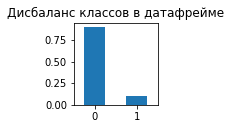

0    0.898321
1    0.101679
Name: toxic, dtype: float64


In [7]:
df['toxic'].value_counts(normalize = 1).plot(kind='bar', figsize=(1.5,1.5),title = 'Дисбаланс классов в датафрейме')
plt.xticks(rotation=0)
plt.show()
print (df['toxic'].value_counts(normalize = 1))

### Очистка и лемматизация текста

**Подготовим функцию которая очисти и лемматизирует текст**

In [8]:
def lemm_clear_corp(text):    
     
    corp = " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text)])                
    corp = re.sub(r'[^a-zA-Z ]', ' ', corp)
    corp = corp.split() 
    corp = ' '.join(corp)
    return corp   

Wordnet — это большая, свободно распространяемая и общедоступная лексическая база данных для английского языка с целью установления структурированных семантических отношений между словами.

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
%%time
notebook.tqdm.pandas()
lemm_clear_corpus = df['text'].progress_apply(lemm_clear_corp)
lemm_clear_corpus_sample = df_sample['text'].progress_apply(lemm_clear_corp)

  0%|          | 0/159571 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

CPU times: user 2min 33s, sys: 1.47 s, total: 2min 34s
Wall time: 2min 40s


### Разбиение на выборки

Разбиваем на выборки (как для всего DF  так и сокращенного)

In [11]:
X_train, X_valid_tmp, y_train, y_valid_tmp = train_test_split(lemm_clear_corpus, df['toxic'], test_size=0.3, random_state=12345)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_tmp, y_valid_tmp, test_size=0.5, random_state=12345)
print (X_train.shape,X_valid.shape,X_test.shape)

(111699,) (23936,) (23936,)


In [12]:
X_train_sample, X_valid_tmp_sample, y_train_sample, y_valid_tmp_sample = train_test_split(lemm_clear_corpus_sample, df_sample['toxic'], test_size=0.3, random_state=12345)
X_valid_sample, X_test_sample, y_valid_sample, y_test_sample = train_test_split(X_valid_tmp_sample, y_valid_tmp_sample, test_size=0.5, random_state=12345)
print (X_train_sample.shape,X_valid_sample.shape,X_test_sample.shape)

(3500,) (750,) (750,)


**Еще раз проверил, что дисбалланс классов тот же**

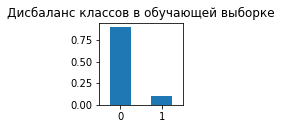

0    0.898406
1    0.101594
Name: toxic, dtype: float64


In [13]:
y_train.value_counts(normalize = 1).plot(kind='bar', figsize=(1.5,1.5),title = 'Дисбаланс классов в обучающей выборке')
plt.xticks(rotation=0)
plt.show()
print (y_train.value_counts(normalize = 1))

**Создаем функцию по выравниванию классов**

In [14]:
def upsample(features,target,repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled,random_state=12345)

    return features_upsampled, target_upsampled

### Выравнивание классов (для обучающей выборки)

In [15]:
X_train, y_train = upsample(X_train, y_train, 9)
print(X_train.shape, y_train.shape)

(202483,) (202483,)


In [16]:
X_train_sample, y_train_sample = upsample(X_train_sample, y_train_sample, 9)
print(X_train_sample.shape, y_train_sample.shape)

(6532,) (6532,)


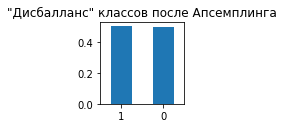

1    0.504398
0    0.495602
Name: toxic, dtype: float64


In [17]:
y_train.value_counts(normalize = 1).plot(kind='bar', figsize=(1.5,1.5),title = '"Дисбалланс" классов после Апсемплинга')
plt.xticks(rotation=0)
plt.show()
print (y_train.value_counts(normalize = 1))

**Переводим текст в вектора**

In [18]:
tfidf = TfidfVectorizer(stop_words=stop_words) 

In [19]:
X_train_vector = tfidf.fit_transform(X_train)
X_valid_vector = tfidf.transform(X_valid)
X_test_vector = tfidf.transform(X_test)

In [20]:
X_train_vector_sample = tfidf.transform(X_train_sample)
X_valid_vector_sample = tfidf.transform(X_valid_sample)
X_test_vector_sample = tfidf.transform(X_test_sample)

### Вывод  (подготовка)
Подготовка завершена. Текст ощищен, лемматизирован и переведен в вектора. Так же созданы выборки: обучающая, валидационная и тестовая.  
В обучающей выборке проведено выравнивание классов.Можно приступать к обучению.

## Обучение

**Создадим список моделей для тестирования**

In [21]:
models = []
models.append(('LR', LogisticRegression(random_state=12345,class_weight='balanced', C=5))) #max_iter=1000, n_jobs=-1,solver='lbfgs',
models.append(('LSVC', LinearSVC(random_state=12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier( random_state=12345,class_weight='balanced'))) #max_depth = 300, n_estimators = 500,
models.append(('AB', AdaBoostClassifier( n_estimators = 500, random_state=12345)))

In [22]:
def model_best(features_train,target_train,features_valid,target_valid, models):
    #valid_pred = []
    for name, model in models:

        ml = model
        ml.fit(features_train, target_train)
        #X_valid_ml = tfidf.transform(features_valid)
        predict_valid = ml.predict(features_valid)
        f1_valid = f1_score(target_valid, predict_valid)

        print ('Модель:',name)
        print ('f1_valid:',f1_valid)

        #valid_pred.append(predict_valid) # здесь храним предсказания от моделей
    
        fig, ax = plt.subplots(figsize=(2.5,2.5))
        confusion_matrix = pd.crosstab(target_valid, predict_valid, rownames=['Actual'], colnames=['Predicted'])
        sns.heatmap(confusion_matrix, annot=True, fmt='3.0f', ax=ax)
        plt.show()

### Предварительная оценка метрики на различных моделях

**Визуализируем F1-метрику**

Модель: LR
f1_valid: 0.6721311475409836


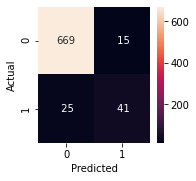

Модель: LSVC
f1_valid: 0.65


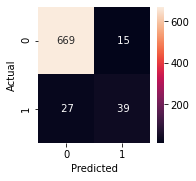

Модель: KNN
f1_valid: 0.44927536231884063


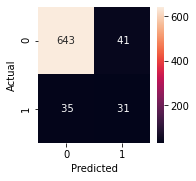

Модель: RF
f1_valid: 0.4651162790697675


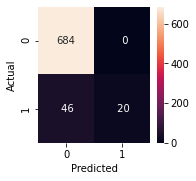

Модель: AB
f1_valid: 0.6713286713286714


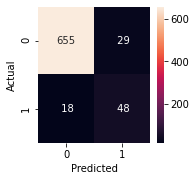

In [23]:
model_best (X_train_vector_sample, y_train_sample, X_valid_vector_sample, y_valid_sample, models)

Итак, по дефолту и на ограниченной выборке (5 000 элементов), наиболее хорошо показала себя модель LinearSVC и LR, уже сейчас они показали значение метрики f1 = 0.67.   
Дабы окончательно увердиться в выбором, проведем еще исследование на паре моделей, с подбором гиперпараметров, НО опять же в рамках этой выборки (5 000).

In [24]:
# здесь подберем наилучшие параметры для модели
def testing_f1(model,parametrs,features, target,tech,alg):
    model= model 
    parametrs_model = parametrs
    grid_rfc = GridSearchCV(model, parametrs_model, n_jobs=-1, scoring='f1', cv=5)
    best_model = grid_rfc.fit(features, target)
    predict_train = best_model.predict(features)
    f1_scor = f1_score(target, predict_train)
    print ('\nАлгоритм:',alg)
    print ('Метод выравнивания дисбаланса классов:',tech)
    print('Лучшие параметры', grid_rfc.best_score_, '\nс параметрами', grid_rfc.best_params_ )
    print('F1-оценка (тренировочная выборка)', f1_scor )
    return best_model

In [25]:
parametrs = {'n_estimators': [50,100],'random_state':[12345], 'max_depth': [5,20]}

In [26]:
%%time
bm = testing_f1(RandomForestClassifier(),parametrs,X_train_vector_sample, y_train_sample,'UpSampled','RandomForest');


Алгоритм: RandomForest
Метод выравнивания дисбаланса классов: UpSampled
Лучшие параметры 0.8567390622487798 
с параметрами {'max_depth': 20, 'n_estimators': 50, 'random_state': 12345}
F1-оценка (тренировочная выборка) 0.8779354838709679
CPU times: user 15 s, sys: 34.7 ms, total: 15 s
Wall time: 15 s


In [27]:
#X_test_bm = tfidf.transform(X_test_)
predict_test_bm = bm.predict(X_test_vector_sample)
f1_score(y_test_sample, predict_test_bm)

0.3496143958868895

даже с подбором гиперпараметров алгоритм RandomForestClassifier не показал должного результата.  
Попробуем с Кэтбустером.

### Предварительная оценка метрики  f1 на CatBoostClassifier

In [28]:
def catboost_time (features_train, target_train,features_test, target_test):
    start1 = time.time()
    model = CatBoostClassifier( eval_metric='TotalF1', learning_rate=0.1, 
                          random_state=12345, verbose=20,
                          iterations=100, depth=6,class_weight='balanced',text_features='lemm_text')#loss_function='RMSE',

    model_cb = model.fit(features_train, target_train, text_features='lemm_text')
    finish1 = time.time() - start1
    start2  = time.time()
    predict = model_cb.predict(features_test)
    finish2 = time.time() - start2
    result = [finish1,finish2,f1_score(y_test, predict)]
    print ('\nВремя обучения,сек.:',result[0])
    print ('Время прогнозирования,сек.:',result[1])
    print ('\nРазмер метрики f1 на тестовой выборке:',result[2])
    print ('\nBest score:',model_cb.best_score_)
    return result,model_cb;

In [29]:
%%time
model_cb = CatBoostClassifier(eval_metric='TotalF1',random_state = 12345)
params = {'depth':[5], 'learning_rate':np.arange(0.1,1,0.2), 'iterations':[10]}
grid_cb = model_cb.grid_search(params, Pool(X_train_vector_sample, y_train_sample),cv=3)

0:	learn: 0.5629439	test: 0.5459347	best: 0.5459347 (0)	total: 174ms	remaining: 1.56s
1:	learn: 0.6563706	test: 0.6389206	best: 0.6389206 (1)	total: 268ms	remaining: 1.07s
2:	learn: 0.6727155	test: 0.6552807	best: 0.6552807 (2)	total: 364ms	remaining: 848ms
3:	learn: 0.6912005	test: 0.6795100	best: 0.6795100 (3)	total: 459ms	remaining: 689ms
4:	learn: 0.6968799	test: 0.6861805	best: 0.6861805 (4)	total: 556ms	remaining: 556ms
5:	learn: 0.7135253	test: 0.7017863	best: 0.7017863 (5)	total: 648ms	remaining: 432ms
6:	learn: 0.7114324	test: 0.6977370	best: 0.7017863 (5)	total: 744ms	remaining: 319ms
7:	learn: 0.7235868	test: 0.7162775	best: 0.7162775 (7)	total: 837ms	remaining: 209ms
8:	learn: 0.7397467	test: 0.7203160	best: 0.7203160 (8)	total: 931ms	remaining: 103ms
9:	learn: 0.7663537	test: 0.7463678	best: 0.7463678 (9)	total: 1.02s	remaining: 0us

bestTest = 0.7463677707
bestIteration = 9

0:	loss: 0.7463678	best: 0.7463678 (0)	total: 2.62s	remaining: 10.5s
0:	learn: 0.5629439	test: 0.5

In [30]:
%%time
model_cb = CatBoostClassifier(depth=grid_cb['params']['depth'], 
                              learning_rate=grid_cb['params']['learning_rate'],
                              verbose=100,eval_metric='TotalF1')
model_cb = model_cb.fit(Pool(X_train_vector_sample, y_train_sample))

0:	learn: 0.6049921	total: 125ms	remaining: 2m 4s
100:	learn: 1.0000000	total: 10.2s	remaining: 1m 31s
200:	learn: 1.0000000	total: 20.5s	remaining: 1m 21s
300:	learn: 1.0000000	total: 30.9s	remaining: 1m 11s
400:	learn: 1.0000000	total: 41s	remaining: 1m 1s
500:	learn: 1.0000000	total: 50.8s	remaining: 50.6s
600:	learn: 1.0000000	total: 1m	remaining: 40.2s
700:	learn: 1.0000000	total: 1m 10s	remaining: 30s
800:	learn: 1.0000000	total: 1m 20s	remaining: 19.9s
900:	learn: 1.0000000	total: 1m 29s	remaining: 9.85s
999:	learn: 1.0000000	total: 1m 39s	remaining: 0us
CPU times: user 1min 40s, sys: 310 ms, total: 1min 40s
Wall time: 1min 42s


In [31]:
predict_test3 = model_cb.predict(X_test_vector_sample)
f1_score(y_test_sample, predict_test3)

0.6225165562913907

Кэтбуст на небольшом объеме выборки так же не впечатлил, значение метрики 0.6. 

Интресно, а как отработает ансамбль из алгоритмов?!

### Предварительная оценка метрики  f1 на ансамбле моделей

In [32]:
# чуть изменим список с моделями
def get_models():
    models = []
    models.append(('LR', LogisticRegression(random_state=12345,class_weight='balanced', C=5)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('RG', RandomForestClassifier(random_state=12345,class_weight='balanced')))
    return models

In [33]:
def fit_ensemble(models, X_train, X_valid, y_train, y_valid):
    meta_X = []
    for name, model in models:
# обучаем модель, берем от нее предсказания
        model.fit(X_train, y_train)

        #X_val = tfidf.transform(X_valid)
        yhat = model.predict(X_valid)
        yhat = yhat.reshape(len(yhat), 1)

# сохраняем предсказания они будут в дальнейшем использованы как входные значения
        meta_X.append(yhat)
# создаем двумерный массив, это как раз и будут фьючи
    meta_X = hstack(meta_X)
#  на этом "бульоне" обучим модель
    blender = LinearSVC(random_state=12345)
    blender.fit(meta_X, y_valid)
    return blender

In [34]:
#  здесь получаем предсказания от ансамбля.
def predict_ensemble(models, blender, X_test):
    meta_X = []
    for name, model in models:
        yhat = model.predict(X_test)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)
    return blender.predict(meta_X)

In [35]:
%%time
models = get_models()
blender = fit_ensemble(models, X_train_vector_sample, X_valid_vector_sample, y_train_sample, y_valid_sample)

#X_test_tmp = tfidf.transform(X_test_)
yhat = predict_ensemble(models, blender, X_test_vector_sample)

score = accuracy_score(y_test_sample, yhat)
f1_test = f1_score(y_test_sample, pd.Series(yhat))

print('Blending Accuracy: %.3f' % (score*100))
print('f1_test: ',f1_test)

CPU times: user 1min 31s, sys: 8.82 s, total: 1min 40s
Wall time: 1min 40s


Ансамбль в данном исполнении в общем тоже как то не впечатлил  
Резюмируя, останавливаемся на модели LogisticRegression или LinearSVC().  
Прогоним модель по полному датафрейму, посмотрим размер метрики:

###  Обучение модели на полном DF

#### Алгоритм LinearSVC

In [ ]:
%%time
ml = LinearSVC(random_state=12345 ).fit(X_train_vector, y_train) #C=10, max_iter = 10000
X_train_vector = tfidf.fit_transform(X_train)
X_test_lsvc = tfidf.transform(X_test)
predict_test = ml.predict(X_test_lsvc)
f1_test = f1_score(y_test, predict_test)
print ('f1_test:',f1_test)
fig, ax = plt.subplots(figsize=(2.5,2.5))
confusion_matrix = pd.crosstab(y_test, predict_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='3.0f', ax=ax)
plt.show()

#### Алгоритм LogisticRegression

In [ ]:
%%time
ml = LogisticRegression(random_state=12345,class_weight='balanced', C=5, max_iter = 5000).fit(X_train_vector, y_train)
X_train_vector = tfidf.fit_transform(X_train)
X_test_lsvc = tfidf.transform(X_test)
predict_test = ml.predict(X_test_lsvc)
f1_test = f1_score(y_test, predict_test)
print ('f1_test:',f1_test)
fig, ax = plt.subplots(figsize=(2.5,2.5))
confusion_matrix = pd.crosstab(y_test, predict_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='3.0f', ax=ax)
plt.show()

Да, вот наш выбор, от 10 секунд (LinearSVC) до пары минут для LogisticRegression и метрика f1 достигнута!  
С алгоритмом LogisticRegression метрика f1 достигла заначения равным 0.758

Здесь я немного решил визуализировать рез-ты метрик. Библиотеки не стал на верх выносить, т.к. они только для этих графиков.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
lsvc = LogisticRegression(random_state=12345, class_weight ='balanced', C=10, max_iter = 5000).fit(X_train_vector, y_train)
predict_trn = lsvc.predict(X_train_vector)

fig, ax1 = plt.subplots()

precision1, recall1,_ = precision_recall_curve(y_train, predict_trn)
disp1 = PrecisionRecallDisplay(precision=precision1, recall=recall1)

precision2, recall2,_ = precision_recall_curve(y_test, predict_test)
disp2 = PrecisionRecallDisplay(precision=precision2, recall=recall2)

disp1.plot(ax=ax1, label='Метрика на выборке Train')
disp2.plot(ax=ax1, label='Метрика на выборке Test')

plt.show();

In [ ]:
fig, ax1 = plt.subplots()

y_score = lsvc.decision_function(X_test_lsvc)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lsvc.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=lsvc.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

roc_display.plot(ax=ax1,label='ROC кривая')
pr_display.plot(ax=ax1, label='F1-метрика')

plt.show();

## Выводы

**В данном проекте удалось очистить от "лишних" символов, лемматизировать текст (комментрии пользователей) с последующим преобразованием  в "цифровые вектора", что позволило в дальнейшем обучить модель предсказывать эмоцианальную составляющую контента (комментария) - позитивный или негативный.  
В виду того, что критерий оценки комментария представлял ответ в виде 0 или 1, то эффективной метрикой качестве предсказания была принята f1 - метрика, учитвающая как точность так и полноту предсказания.
Для выравнивания классов (среди критерия оценки) был использован метод upsample. А наибольшый показатель метрики f1 удалось достич на алгоритме LogisticRegression с размерностью метрики 0.758.**


## P.S. BERT

In [ ]:
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install transformers

In [ ]:
#df = pd.read_csv(r'C:\Users\Dimm_inc\Downloads\toxic_comments.csv')

In [ ]:
df = df.sample(1000).reset_index(drop=True)

In [ ]:
lemm_clear_corpus = df['text'].progress_apply(lemm_clear_corp)

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')


tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
tokenized = lemm_clear_corpus.apply((lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=50)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
attention_mask = np.where(padded != 0, 1, 0)

In [ ]:
# encoded_dict = tokenizer.encode_plus(
#                         sentence,                      # Sentence to encode.
#                         add_special_tokens = True,    # Add '[CLS]' and '[SEP]'
#                         max_length = max_length,      # Pad & truncate all sentences.
#                         pad_to_max_length = True,
#                         return_attention_mask = return_attention_mask,   # Construct attn. masks.
#                         return_tensors = 'pt',     # Return pytorch tensors.
#                    )

In [ ]:
batch_size = 100


embeddings = []

for i in notebook.tqdm(range(padded.shape[0] // batch_size)):

#Преобразуем данные в формат тензоров (англ. tensor) — многомерных векторов в библиотеке torch. 
#Тип данных LongTensor (англ. «длинный тензор») хранит числа в «длинном формате», 
#то есть выделяет на каждое число 64 бита

    batch = torch.tensor(padded[batch_size*i:batch_size*(i+1)]) 
    attention_mask_batch = torch.tensor(attention_mask[batch_size*i:batch_size*(i+1)])

#Для ускорения вычисления функцией no_grad() (англ. no gradient, «нет градиента») 
#в библиотеке torch укажем, что градиенты не нужны: модель BERT обучать не будем. 

    with torch.no_grad():

#Чтобы получить эмбеддинги для батча, передадим модели данные и маску:
        batch_embeddings = model(batch, attention_mask=attention_mask_batch)

#Из полученного тензора извлечём нужные элементы и добавим в список всех эмбеддингов:
    embeddings.append(batch_embeddings[0][:,0,:].numpy())

In [ ]:
features = np.concatenate(embeddings)

In [ ]:
train_features, test_features, train_target, test_target = train_test_split(features, df['toxic'])

In [ ]:
print (train_features.shape[0], test_features.shape[0])

In [ ]:
#parameters = {'C': np.linspace(0.1, 100, 20),'class_weight':['balanced', 'None']}
#grid_search = GridSearchCV(LogisticRegression(random_state=12345), parameters)
#grid_search.fit(train_features, train_target)

#print('best parameters: ', grid_search.best_params_)
#print('best scrores: ', grid_search.best_score_)

In [ ]:
lr_clf = LogisticRegression( C=5)
lr_clf.fit(train_features, train_target)

In [ ]:
predict_test = lr_clf.predict(test_features)
f1_test = f1_score(test_target, predict_test)
f1_test